In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
import numpy as np 

In [5]:
import os
for dirname, _, filenames in os.walk('training.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
train = pd.read_csv('training.csv')
test = pd.read_csv('testing.csv')

In [7]:
train.shape

(4920, 134)

In [8]:
test.shape

(42, 133)

In [9]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [10]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [11]:
train = train.drop(["Unnamed: 133"],axis=1)

In [12]:
train.isnull().any()

itching                           False
skin_rash                         False
nodal_skin_eruptions              False
continuous_sneezing               False
shivering                         False
chills                            False
joint_pain                        False
stomach_pain                      False
acidity                           False
ulcers_on_tongue                  False
muscle_wasting                    False
vomiting                          False
burning_micturition               False
spotting_ urination               False
fatigue                           False
weight_gain                       False
anxiety                           False
cold_hands_and_feets              False
mood_swings                       False
weight_loss                       False
restlessness                      False
lethargy                          False
patches_in_throat                 False
irregular_sugar_level             False
cough                             False


In [13]:
train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [14]:
B = train.drop(["prognosis"],axis=1) # symptoms 
A = train[["prognosis"]] # diseases 
C = test.drop(["prognosis"],axis=1) # symptoms - testing 
x_train, x_test, y_train, y_test = train_test_split(B,A,test_size=0.2) # 20:80 

In [15]:
mod = RandomForestClassifier(n_estimators = 100,n_jobs = 5, criterion= 'entropy',random_state = 42)
mod = mod.fit(x_train,y_train.values.ravel())
pred = mod.predict(x_test)

In [16]:
metrics.accuracy_score(y_test, pred)

1.0

In [17]:
report = classification_report(y_test, pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.0,1.0,1.0,27.0
AIDS,1.0,1.0,1.0,25.0
Acne,1.0,1.0,1.0,24.0
Alcoholic hepatitis,1.0,1.0,1.0,28.0
Allergy,1.0,1.0,1.0,21.0
Arthritis,1.0,1.0,1.0,22.0
Bronchial Asthma,1.0,1.0,1.0,25.0
Cervical spondylosis,1.0,1.0,1.0,24.0
Chicken pox,1.0,1.0,1.0,29.0
Chronic cholestasis,1.0,1.0,1.0,23.0


In [18]:
cm = confusion_matrix(y_test, pred)
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
test = test.join(pd.DataFrame(mod.predict(C),columns=["predicted"]))[["prognosis","predicted"]]

test['result']= ' '
for i in range(len(test)):
    if test["prognosis"][i] == test["predicted"][i]:
        test['result'].iloc[i] = 'Correct'
    else:
        test['result'].iloc[i] = 'Incorrect'
test

,prognosis,predicted,result
0,Fungal infection,Fungal infection,Correct
1,Allergy,Allergy,Correct
2,GERD,GERD,Correct
3,Chronic cholestasis,Chronic cholestasis,Correct
4,Drug Reaction,Drug Reaction,Correct
5,Peptic ulcer diseae,Peptic ulcer diseae,Correct
6,AIDS,AIDS,Correct
7,Diabetes,Diabetes,Correct
8,Gastroenteritis,Gastroenteritis,Correct
9,Bronchial Asthma,Bronchial Asthma,Correct


In [20]:
print(classification_report(y_test,pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        27
                                   AIDS       1.00      1.00      1.00        25
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        28
                                Allergy       1.00      1.00      1.00        21
                              Arthritis       1.00      1.00      1.00        22
                       Bronchial Asthma       1.00      1.00      1.00        25
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        29
                    Chronic cholestasis       1.00      1.00      1.00        23
                            Common Cold       1.00      1.00      1.00        24
                           

[Text(0.7561349307789522, 0.9814814814814815, 'X[32] <= 0.5\nentropy = 5.349\nsamples = 2533\nvalue = [87, 108, 98, 87, 109, 98, 83, 119, 100, 113, 99\n78, 76, 112, 89, 99, 77, 101, 99, 96, 90, 107\n99, 88, 107, 83, 88, 95, 91, 98, 97, 94, 103, 88\n86, 84, 119, 107, 92, 91, 101]'),
 Text(0.6372698615579044, 0.9444444444444444, 'X[5] <= 0.5\nentropy = 5.103\nsamples = 2050\nvalue = [87, 108, 98, 6, 109, 98, 83, 119, 100, 7, 99, 78\n76, 112, 89, 99, 77, 101, 99, 5, 4, 4, 2, 88\n107, 83, 88, 95, 3, 98, 97, 94, 103, 88, 86, 84\n119, 107, 92, 91, 7]'),
 Text(0.5668191348805147, 0.9074074074074074, 'X[40] <= 0.5\nentropy = 4.85\nsamples = 1637\nvalue = [87, 108, 98, 6, 14, 98, 83, 119, 100, 7, 3, 3\n76, 112, 89, 99, 77, 101, 99, 5, 4, 4, 2, 88\n107, 83, 88, 95, 3, 6, 97, 94, 103, 88, 5, 84\n4, 0, 92, 91, 7]'),
 Text(0.5159912109375, 0.8703703703703703, 'X[56] <= 0.5\nentropy = 4.746\nsamples = 1513\nvalue = [87, 108, 98, 6, 14, 98, 83, 119, 100, 7, 3, 3\n76, 112, 89, 99, 77, 8, 99, 5, 4, 4, 

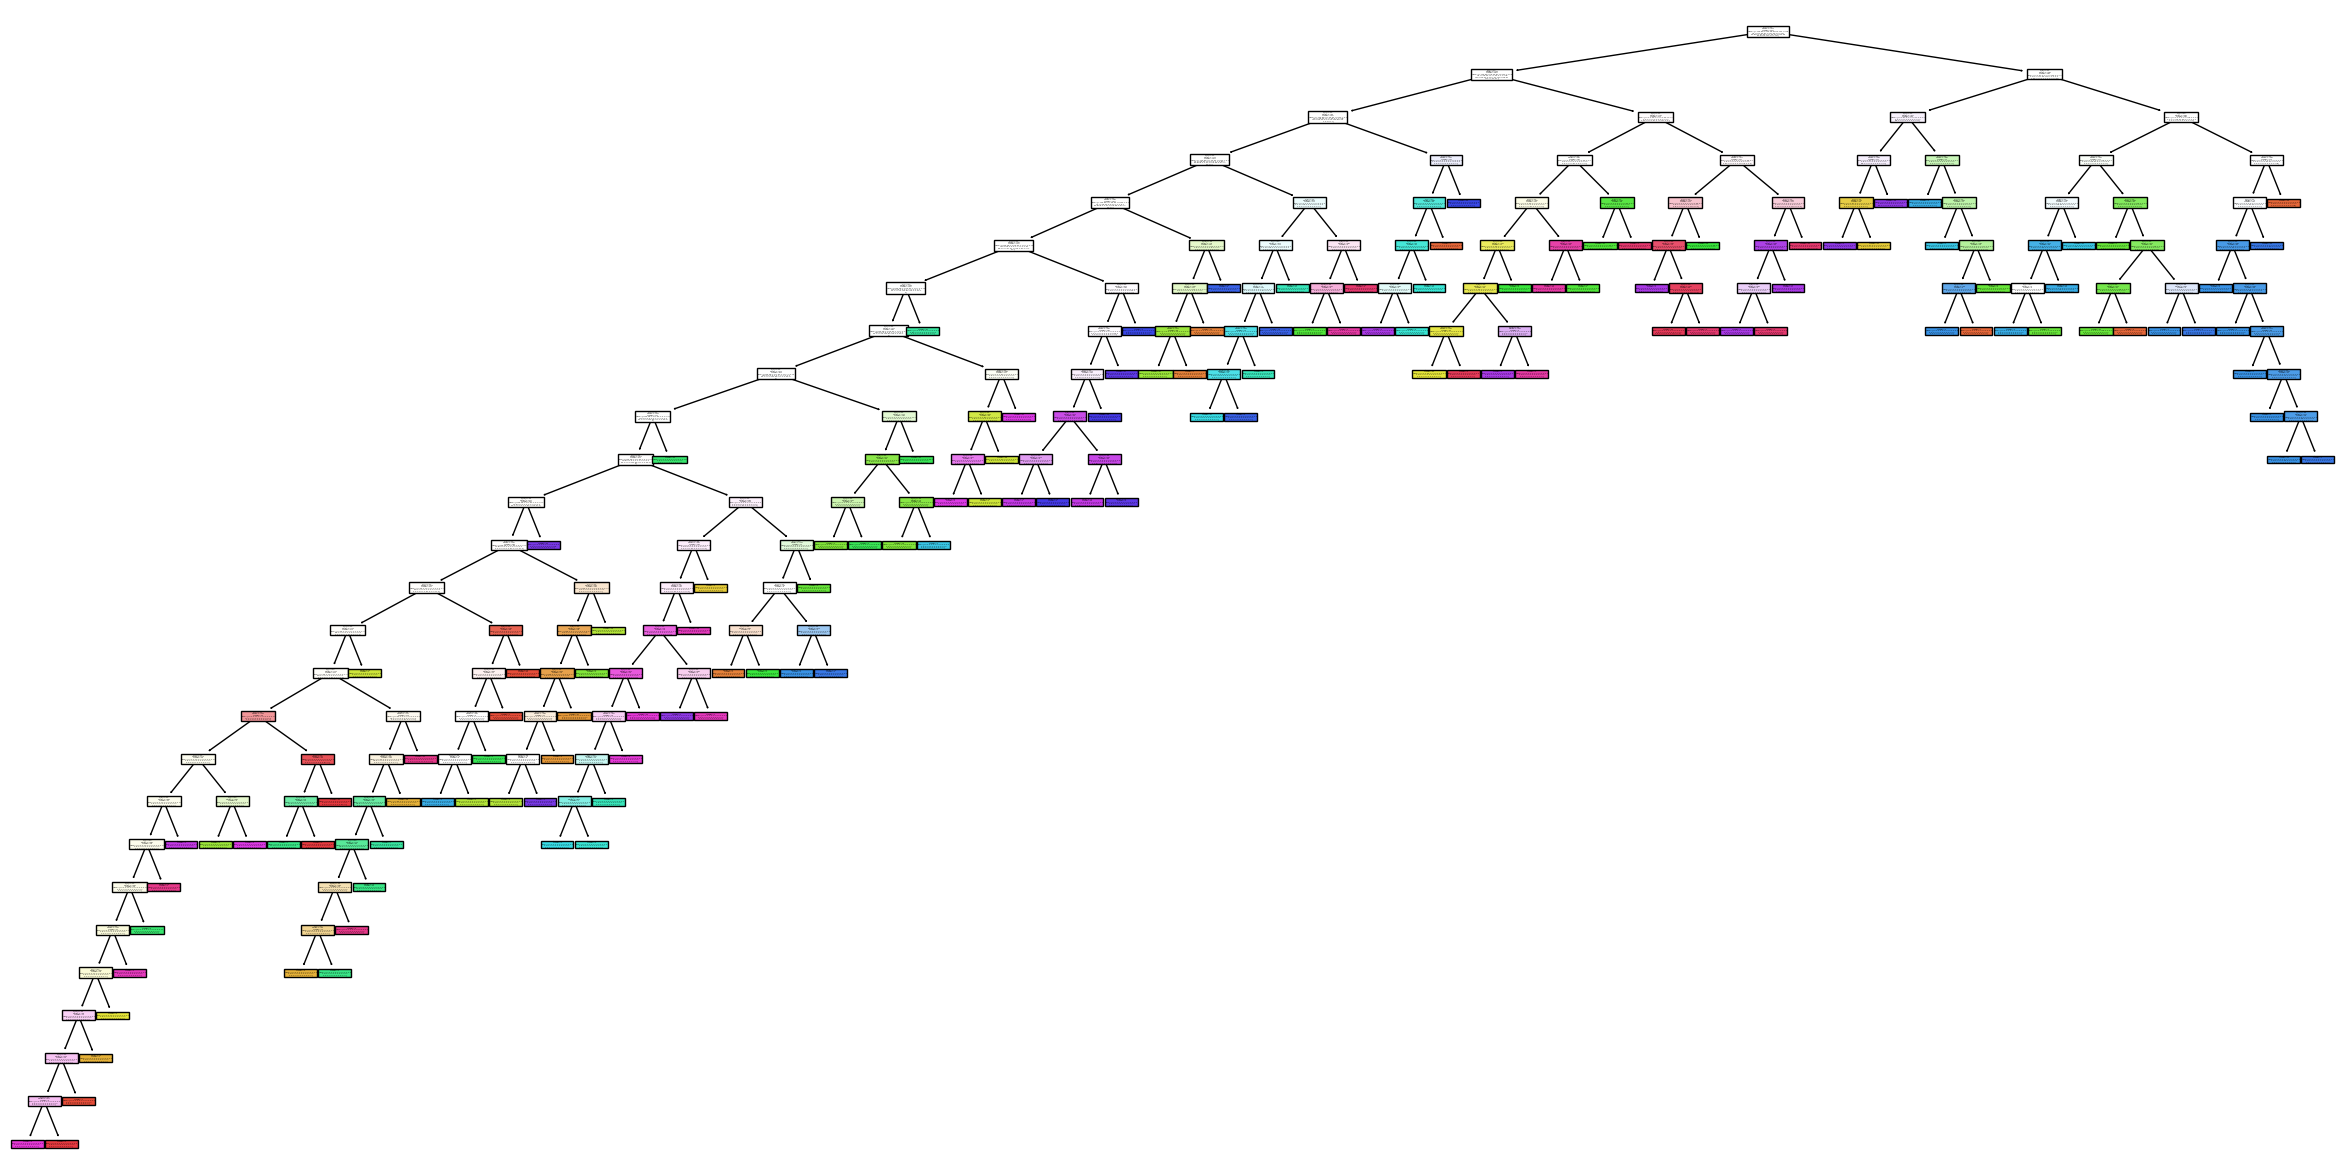

In [21]:
from sklearn import tree
plt.figure(figsize=(30,15))
tree.plot_tree(mod.estimators_[8],filled = True)

# My process 

##  Import Necessery Library

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

## Loading Data

In [23]:
 train = pd.read_csv('training.csv')

In [24]:
train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [25]:
test=pd.read_csv('testing.csv')
test.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

## Spliting data for training and testing

In [26]:
X_train = train.drop('prognosis', axis=1)
y_train = train['prognosis']
X_test = test.drop('prognosis', axis=1)
y_test = test['prognosis']

## Checking null values

In [27]:
X_train.isnull().sum()

itching                              0
skin_rash                            0
nodal_skin_eruptions                 0
continuous_sneezing                  0
shivering                            0
chills                               0
joint_pain                           0
stomach_pain                         0
acidity                              0
ulcers_on_tongue                     0
muscle_wasting                       0
vomiting                             0
burning_micturition                  0
spotting_ urination                  0
fatigue                              0
weight_gain                          0
anxiety                              0
cold_hands_and_feets                 0
mood_swings                          0
weight_loss                          0
restlessness                         0
lethargy                             0
patches_in_throat                    0
irregular_sugar_level                0
cough                                0
high_fever               

In [28]:
import numpy as np
print(np.isinf(X_train).sum())

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

## Calculates a threshold value as half the number of rows

In [29]:
threshold = len(X_train) * 0.5
X_train = X_train.dropna(thresh=threshold, axis=1)
X_test = X_test[X_train.columns]

## Fitting data

In [30]:
 from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

## Classification report

In [32]:
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9761904761904762


In [33]:
print(classification_report(y_test,y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           